# Sandpiles & Stock Markets

### Description

The Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation was first introduced by Per Bak, Chao Tang and Kurt Wiesenfeld in a 1987 paper, the sandpile simulation was the first discovered example of a dynamical system displaying self-organized criticality (SOC), which is a property of dynamical systems that have a critical point or state as an attractor.




## Analysis
Sandpile simulations were 

### Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation

In [94]:
from random import randrange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn') # pretty matplotlib plots

def check_threshold(sandpile,i,j, threshold):
    if not (i > sandpile.shape[0] or  j > sandpile.shape[1] or i <0 or j <0) and sandpile[i,j] >= threshold:
        toppling(sandpile,i,j,threshold)

def toppling(sandpile,i,j,threshold):
    # (1) z(i, j, t) = z(i, j, t) -  4
    sandpile[i,j] = sandpile[i,j] -  threshold
  
    # (2) z(i ± 1, j, t) = z(i ± 1, j, t) + 1
    if i + 1 <= sandpile.shape[0]-1:
        sandpile[i + 1,j] += 1
        check_threshold(sandpile,i + 1,j,threshold)
    if i - 1 >= 0:
        sandpile[i - 1,j] += 1
        check_threshold(sandpile,i - 1,j,threshold)

    # (3) z(i, j ± 1, t) = z(i, j ± 1, t) + 1
    if j + 1 <= sandpile.shape[1]-1:
        sandpile[i ,j + 1] += 1
        check_threshold(sandpile,i,j + 1,threshold)
    if j - 1 >= 0:
        sandpile[i ,j - 1] += 1
        check_threshold(sandpile,i,j - 1,threshold)

def plot(data):
    values = [0,1,2,3]
    plt.figure(figsize=(15,4))
    im = plt.imshow(data, interpolation='none')
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x  , y  , '%.0f' % data[y, x],horizontalalignment='center',verticalalignment='center', )
    plt.grid(True)
    plt.show()



In [99]:

def BTWsandpile(M,N,time = 20,threshold=4,show_step = 'false' ):
    avalanche = []
    
    # (1) -  initializes an M by N grid
    sandpile = np.zeros((M,N), dtype=int)

    # (2) -  time
    for t in range(time-1):
        M_index = randrange(0,M)
        N_index = randrange(0,N)
        sandpile[M_index,N_index] += 1
        # (3) - toppling
        check_threshold(sandpile,M_index,N_index,threshold)

        # plotting each step
        if not show_step:
            plot(sandpile)
        avalanche.append(sandpile.sum())

    print('The sandpile after',time,'time steps:')
    print(sandpile)
    plt.imshow(sandpile, cmap='hot', interpolation='nearest')
    plt.show()
    plt.plot(range(1,time),avalanche)
    plt.ylabel(' Mass')
    plt.title('Avalanche Mass Accumelation through Time')
    plt.show()
    plt.loglog(range(1,time),avalanche)
    plt.ylabel('Mass')
    plt.title('Avalanche Mass Accumelation through Time - Log Log Plot')
    plt.show()    
    size, area, lifetime, radius = plt.subplots()


The sandpile after 900 time steps:
[[1 2 2]
 [2 1 1]
 [2 2 2]]


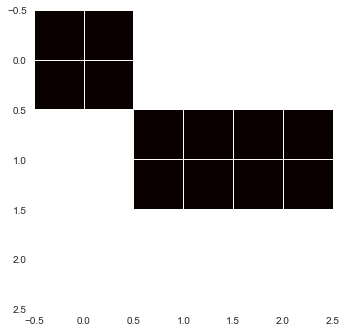

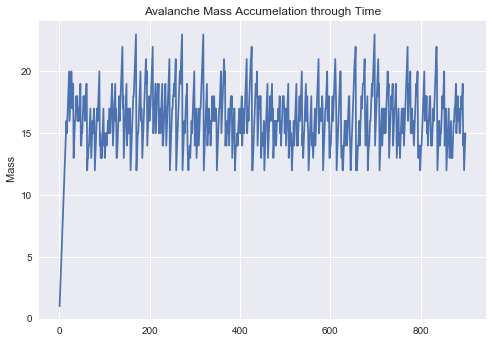

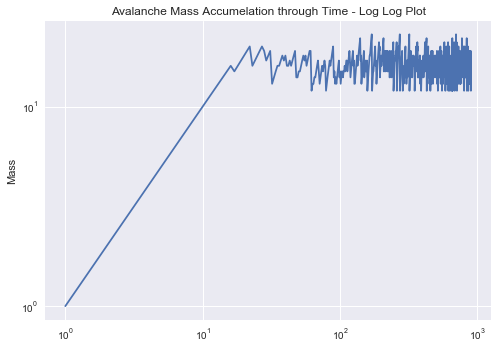

ValueError: not enough values to unpack (expected 4, got 2)

In [100]:
### Change parameters here

M = 3                # table length
N = 3                # table width
time = 900           # time of simulations
threshold = 4        # threshold of toppling condition 
show_step = 'false'  # show sandpile by step

BTWsandpile(M,N,time,threshold,show_step)


## Mass vs Time

#### Avalanche Size
Time, Distribution
Think about how you plot these distributions, and in particular the appropriateness and desirability of a log-log plot. How would what we see in a log-log plot change if the underlying probability function (Gaussian or power law etc) changed? Fit a power law and track the exponent of the power law fit, and investigate if it varies for changing model parameters. (Size of table, ”squareness” of table, etc).





#### Avalanche Lifetime

#### Avalanche Area

#### Avalanche Radius

### (e) Correlations
By fitting various functionals to the data, obtain approximate correlation functions between each of the observables and avalanche size. Your results should be of the form < y >/< x >b

# Modelling Earthquakes 

In [ ]:
##